In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s5e5/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e5/test.csv")
sample_submission = ("/kaggle/input/playground-series-s5e5/sample_submission.csv")

In [3]:
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [4]:
train.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [5]:
train['Sex'].value_counts()

Sex
female    375721
male      374279
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


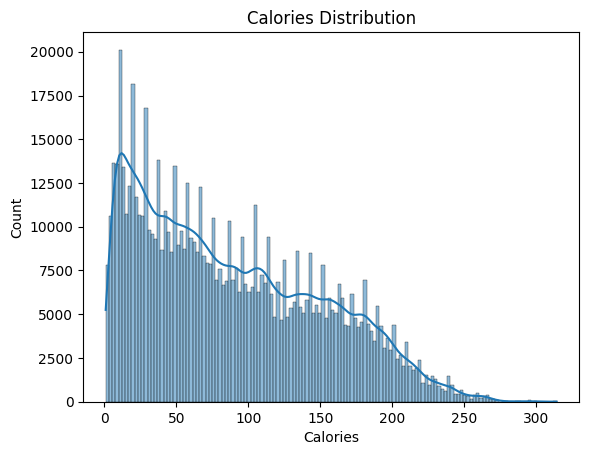

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train['Calories'], kde=True)
plt.title("Calories Distribution")
plt.show()

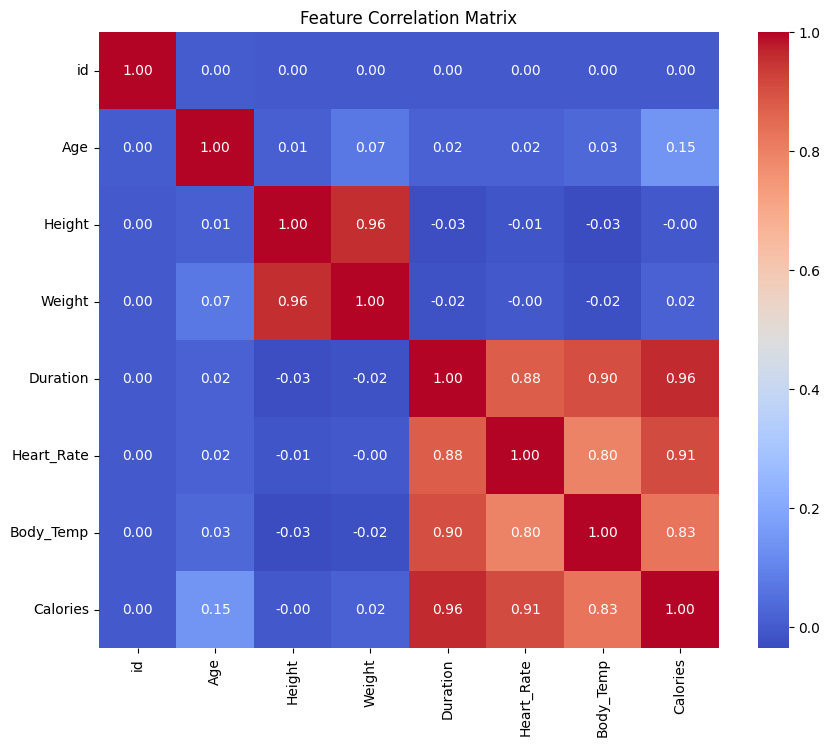

In [7]:
#Only Numerical values
numeric_cols = train.select_dtypes(include=['float64', 'int64'])

# Creating correlation matrix
corr_matrix = numeric_cols.corr()

# Visulazition
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [9]:
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])  # female = 0, male = 1

In [10]:
X = train.drop(columns=['id', 'Calories'])  # delete id because it doesnt effect predict
y = train['Calories']

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print(X_val.shape)
X_val.head()

(150000, 7)


,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
404846,0,56,163.0,61.0,29.0,108.0,40.8
580313,1,44,179.0,87.0,13.0,94.0,40.3
552086,1,41,186.0,84.0,10.0,89.0,39.9
370876,0,38,161.0,58.0,19.0,98.0,40.6
239330,1,57,181.0,77.0,9.0,98.0,40.0


In [13]:
print(y_val.shape)
y_train.head()
print(y_train.shape)
y_val.head()

(150000,)
(600000,)


404846    200.0
580313     64.0
552086     39.0
370876    103.0
239330     52.0
Name: Calories, dtype: float64

In [14]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [15]:
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Validation RMSE: {rmse:.4f}")

Validation RMSE: 3.7355


In [16]:
test['Sex'] = le.transform(test['Sex'])  
X_test = test.drop(columns=['id'])      

In [17]:
test_preds = model.predict(X_test)

In [18]:
submission = pd.read_csv("/kaggle/input/playground-series-s5e5/sample_submission.csv")
submission['Calories'] = test_preds
submission.to_csv("submission.csv", index=False)